# Analysis of SMS structure based on optical fiber

This notebook presents a visual and conceptual review of the results obtained in the spectral analysis. Key aspects such as relevant peak detection, sensitivity calculation, covariance heat map generation and statistical analysis applied to the extracted features are explored. All of this is focused on comparing the behaviour of the two fiber optic configurations studied: with and without etching.

In [53]:
import pandas as pd
from pathlib import Path
import sys
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

## Load generated data

In [54]:
All_Data = Path().resolve()
# Load original DATA
Data = pd.read_csv(All_Data.parents[1]/"Data" / 'raw' / 'Data_1104.csv')

# Load features
data_features = pd.read_csv(All_Data.parents[1]/"Results" / 'tables' / 'features_detected.csv')

# Load statical analyze
shapiro = pd.read_csv(All_Data.parents[1]/"Results" / 'tables' / 'Shapiro_results.csv')     # Test de normalidad
anova = pd.read_csv(All_Data.parents[1]/"Results" / 'tables' / 'anova_results.csv')         # Prueba ANOVA entre grupos
wilcoxon = pd.read_csv(All_Data.parents[1]/"Results" / 'tables' / 'Wilcoxon_results.csv') 



### list of values RI for every column

Lists are then defined with column names corresponding to different variables in the original dataset. These lists facilitate systematic reference to the data during the analysis, including processes such as sensitivity analysis, peak shift tracking and extraction of relevant features.

**RI:** refractive index values considered in the study.

**unetching:** column names corresponding to unetched data.

**etching:** column names associated with etched data.

**colours:** colour palette used for the visualisation of the different series or categories.

In [55]:
RI = ['1.33', '1.35', '1.37', '1.39', '1.40', '1.41']  # O(1)
unetching = ['RI_Water', 'RI_B', 'RI_C', 'RI_D', 'RI_E', 'RI_F']  # O(1)
etching = ['RI_Water_etching', 'RI_B_etching', 'RI_C_etching', 'RI_D_etching', 'RI_E_etching', 'RI_F_etching']  # O(1)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange', 'gray', 'maroon']  # O(1)

The transmission spectra for the two fiber configurations analysed (125 µm and 25 µm diameters) for different refractive indices (RI) are shown below. It can be seen that, in general, the 125 µm spectra present more noticeable peaks that could be taken as a reference. However, to the naked eye, these peaks do not appear to shift significantly with changes in refractive index. This behaviour will be examined in more detail in the following sections of the analysis.

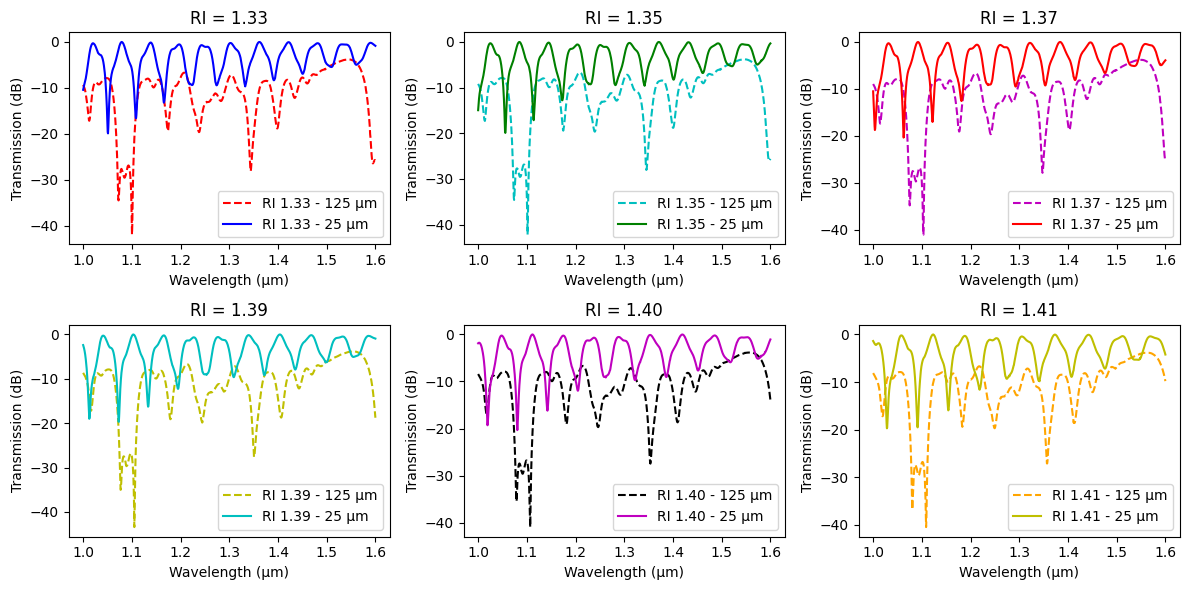

In [56]:
fig, ax = plt.subplots(2, 3, figsize=(12, 6))  # O(1)
ax = ax.flatten()  # O(1)
for i in range(len(RI)):  # O(n
    ax[i].plot(Data['Wavelength'], Data[unetching[i]], '--', color=colors[i+2], label=f'RI {RI[i]} - 125 µm')
    ax[i].plot(Data['Wavelength'], Data[etching[i]], '-', color=colors[i], label=f'RI {RI[i]} - 25 µm')
    ax[i].set_title(f"RI = {RI[i]}")
    ax[i].set_xlabel('Wavelength (µm)')
    ax[i].set_ylabel('Transmission (dB)')
    ax[i].legend()
        #ax[-1].set_axis_off()
    plt.tight_layout()  # O(1)

### Landslide and sensitivity


The graphs obtained show that, as the refractive index (RI) of the surrounding medium increases, the transmission spectrum undergoes a progressive shift. This spectral shift is more pronounced for the 25 µm fibre compared to the 125 µm fibre.

This behaviour is further analysed by means of the sensitivity study, defined as the wavelength variation as a function of the change in refractive index. The results confirm that the 25 µm configuration has a higher sensitivity, which makes it more suitable for applications where a high detection capability is required for small variations in the environment.

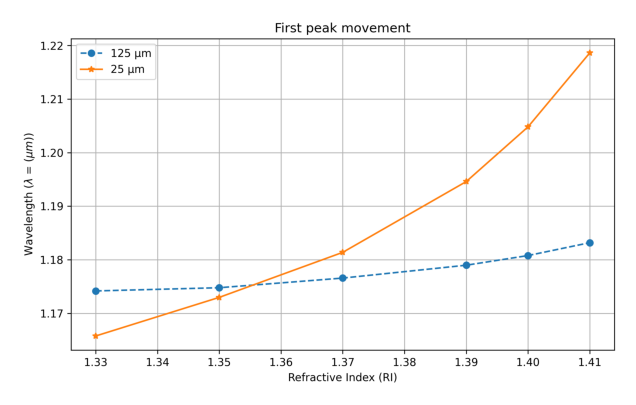

In [57]:
landslide = (All_Data.parents[1] / "Results" / "figures" / "2_first_peak_landslide.png")


img = mpimg.imread(landslide)
plt.figure(figsize=(8, 5))
plt.imshow(img)
plt.axis('off') 
plt.show()

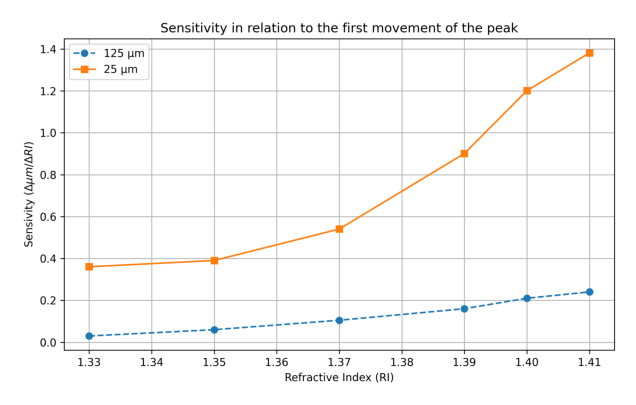

In [58]:
sensitivity = (All_Data.parents[1] / "Results" / "figures" / "3_sensitivity.png")


img = mpimg.imread(sensitivity)
plt.figure(figsize=(8, 5))
plt.imshow(img)
plt.axis('off') 
plt.show()

### Heatmap


In the heat map of the covariance matrix corresponding to the original fibre (125 µm), it is observed that the diagonal presents values equal to 1, which indicates a perfect autocorrelation between each signal and itself, as expected. In addition, the values adjacent to the diagonal are close to zero, suggesting a low correlation between neighbouring signals, i.e., each IR condition affects relatively independently the rest.

On the other hand, in the etched fibre (25 µm), although unity is also maintained in the diagonal, values close to it present negative correlations, suggesting that an increase in the transmission of one condition is associated with a decrease in another nearby one. This behaviour could indicate a higher sensitivity of the system and a more complex redistribution of propagation modes in the smaller diameter fibre, which would be consistent with the higher spectral sensitivity observed above.

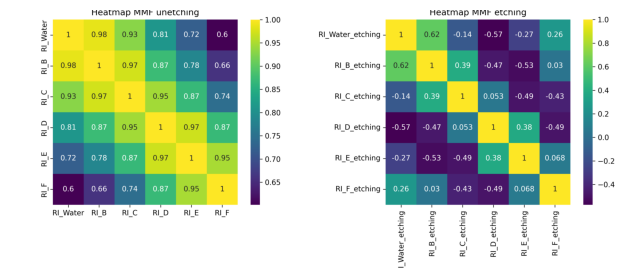

In [59]:
Heatmap_MMF_Diameter = (All_Data.parents[1] / "Results" / "figures" / "4_Heatmap_MMFDiameter.png")


img = mpimg.imread(Heatmap_MMF_Diameter)
plt.figure(figsize=(8, 5))
plt.imshow(img)
plt.axis('off') 
plt.show()

### Relevant peaks


Although the peaks of the transmission spectrum in the 125 µm fiber are more differentiable with respect to their neighbours, it has been observed that their spectral shift is very limited, which could represent a challenge in future experimental tests, especially when trying to detect small variations in the refractive index. For this reason, it is decided to continue the analysis taking as a reference the first three relevant peaks identified in the spectrum of the 25 µm fiber, which presents a higher sensitivity.

It should be noted that, for the final characterisation of the sensor, experimental tests are planned with both fiber configurations. However, this prior analysis is essential to delimit the spectral range in which significant variations occur, especially considering that the equipment available for experimental validation operates in a limited wavelength range. Hence the importance of precisely identifying the peaks of interest to be studied.

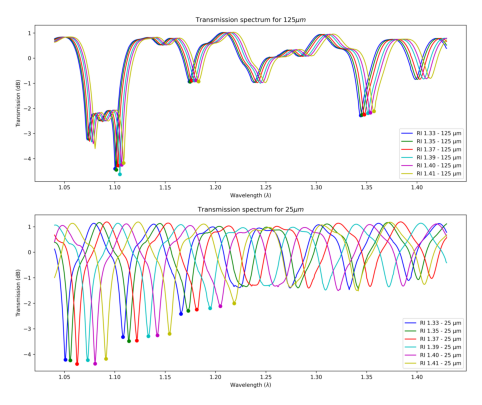

In [60]:
Relevant_Peaks = (All_Data.parents[1] / "Results" / "figures" / "5_relevant_peaks_combined.png")


img = mpimg.imread(Relevant_Peaks)
plt.figure(figsize=(8, 5))
plt.imshow(img)
plt.axis('off')  
plt.show()

### Data Features


The characteristics of the relevant peaks previously identified are extracted in order to perform comparative statistical analyses between the two configurations.

In [61]:
data_features

,MMF Diameter,surrounding environment,Wavelength,Transmission,Spectral width,Prominence
0,125 µm,1.33,1.344144,-2.277176,0.013600,3.059910
1,125 µm,1.33,1.100300,-4.401993,0.034052,5.241594
2,125 µm,1.33,1.174174,-0.930373,0.011665,1.752779
3,25 µm,1.33,1.051051,-4.213810,0.006535,4.337818
4,25 µm,1.33,1.108108,-3.322757,0.010646,4.456625
5,25 µm,1.33,1.165766,-2.416806,0.016555,3.519647
6,125 µm,1.35,1.345345,-2.264291,0.013684,3.047817
7,125 µm,1.35,1.101502,-4.441978,0.034061,5.279665
8,125 µm,1.35,1.174775,-0.941384,0.011609,1.762640
9,25 µm,1.35,1.055856,-4.236527,0.007039,4.625562


### Histogram Features

The histograms of the observed characteristics demonstrate a symmetrical distribution with respect to wavelength and spectral width. In comparison with the other characteristics, transmission remains constant at shallower values. Taking the prominence into account, many prominences have a moderate prominence.

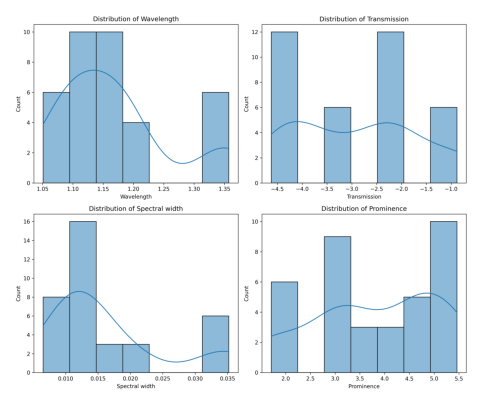

In [62]:
Histogram = (All_Data.parents[1] / "Results" / "figures" / "6_histogram.png")


img = mpimg.imread(Histogram)
plt.figure(figsize=(8, 5))
plt.imshow(img)
plt.axis('off') 
plt.show()

### KDE


In our analysis, the KDE helps to more clearly visualise differences related to the diameter of the multimode fiber (MMF) and how the data is grouped. Unlike grouping by refractive index, KDE enforces separation based on fiber geometry, showing the distribution and overlap between classes more accurately. This is essential for understanding how the relevant features vary between the fiber configurations studied.

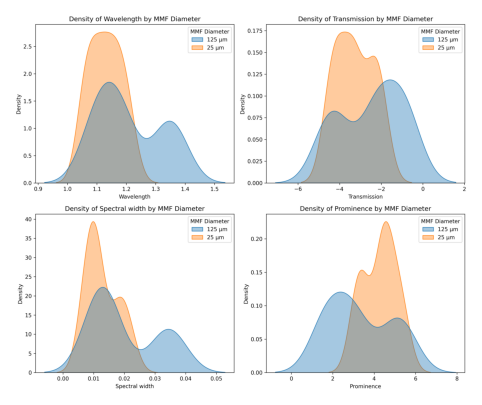

In [63]:
KDE = (All_Data.parents[1] / "Results" / "figures" / "7_density_by_group.png")


img = mpimg.imread(KDE)
plt.figure(figsize=(8, 5))
plt.imshow(img)
plt.axis('off')
plt.show()

### Statical analyze

In [65]:
shapiro

,Unnamed: 0,Diameter,p-value,Result
0,0,125 µm,0.000956,Not normal
1,1,25 µm,0.514185,Normal



For the 125 µm diameter configuration, the null hypothesis is rejected, indicating that the data do not follow a normal distribution, unlike the data for the 25 µm fibre, which do follow a normal distribution.

In [66]:
anova

,H-statistic,p-value,Result
0,8.497267,0.006252,Significant difference


ANOVA analysis yielded a value of 8.497 and a p-value of 0.006, indicating that there is a statistically significant difference between the groups analysed.

In [67]:
wilcoxon

,Unnamed: 0,Diameter1,Diameter2,n samples,W,p-value,Result
0,0,125 µm,25 µm,54,1226.0,0.000016,Significant



Since the data correspond to paired samples and, moreover, do not meet the assumption of normality according to the Shapiro test (in particular for the 125 µm configuration), the non-parametric Wilcoxon test is applied. The result obtained (W = 1226.0, p = 0.000016) indicates a statistically significant difference between the two configurations, suggesting that the change in fibre diameter significantly affects the characteristics analysed.